In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.

for coordinate in coordinates:
    
    print(coordinate[0], coordinate[1])

-46.5922721263411 58.863747313122474
-19.990793788275354 62.10988031543124
50.27991566465636 171.4273984622929
18.403656346595767 -148.66527934128675
61.447949125763216 161.16709023470077
55.82842633603798 110.23770683526953
44.53790221355459 -168.78803702086617
57.33480826994645 99.25732653158951
59.11955520507178 156.24773032148659
82.46154716107904 -77.0494543982135
57.37180359975463 -80.6229199478648
61.33158705943879 130.06739563085284
22.365871343155305 82.39207264158182
56.17975295916253 34.769423076063134
-35.99905222388972 -17.26864419125991
-72.64100552585114 -160.83449860535336
68.49908729267523 -146.85638015491529
40.89638637083647 -13.481571571304556
47.32031545013393 72.45192183464215
52.7597569178339 -144.5862443957941
76.73759536828686 170.6871988451013
-66.22957499137458 18.004760216428735
-19.22809067746087 8.16027946874911
6.309349381526289 179.62107731533513
-10.633183153387705 -165.40914729437927
-48.527138633556056 -145.7251748483468
70.41720378034597 74.860973280

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.

cities = []


# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:

    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    
    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)
        
        
# Print the city count to confirm sufficient count.

len(cities)

617

In [7]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [9]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6c42cd49324ba066af7974ba19c8913f


In [10]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1


# Loop through all the cities in our list.

for i in range(len(cities)):

    
    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

        
    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
# Run an API request for each of the cities.

    try:
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
# If an error is experienced, skip the city.

    except:
        
        print("City not found. Skipping...")
        
        pass

    
# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | elko
Processing Record 2 of Set 1 | elko
Processing Record 3 of Set 1 | elko
Processing Record 4 of Set 1 | elko
Processing Record 5 of Set 1 | elko
Processing Record 6 of Set 1 | elko
Processing Record 7 of Set 1 | elko
Processing Record 8 of Set 1 | elko
Processing Record 9 of Set 1 | elko
Processing Record 10 of Set 1 | elko
Processing Record 11 of Set 1 | elko
Processing Record 12 of Set 1 | elko
Processing Record 13 of Set 1 | elko
Processing Record 14 of Set 1 | elko
Processing Record 15 of Set 1 | elko
Processing Record 16 of Set 1 | elko
Processing Record 17 of Set 1 | elko
Processing Record 18 of Set 1 | elko
Processing Record 19 of Set 1 | elko
Processing Record 20 of Set 1 | elko
Processing Record 21 of Set 1 | elko
Processing Record 22 of Set 1 | elko
Processing Record 23 of Set 1 | elko
Processing Record 24 of Set 1 | elko
Processing Record 25 of Set 1 | elko
Processing Record 26 of 

Processing Record 26 of Set 5 | elko
Processing Record 27 of Set 5 | elko
Processing Record 28 of Set 5 | elko
Processing Record 29 of Set 5 | elko
Processing Record 30 of Set 5 | elko
Processing Record 31 of Set 5 | elko
Processing Record 32 of Set 5 | elko
Processing Record 33 of Set 5 | elko
Processing Record 34 of Set 5 | elko
Processing Record 35 of Set 5 | elko
Processing Record 36 of Set 5 | elko
Processing Record 37 of Set 5 | elko
Processing Record 38 of Set 5 | elko
Processing Record 39 of Set 5 | elko
Processing Record 40 of Set 5 | elko
Processing Record 41 of Set 5 | elko
Processing Record 42 of Set 5 | elko
Processing Record 43 of Set 5 | elko
Processing Record 44 of Set 5 | elko
Processing Record 45 of Set 5 | elko
Processing Record 46 of Set 5 | elko
Processing Record 47 of Set 5 | elko
Processing Record 48 of Set 5 | elko
Processing Record 49 of Set 5 | elko
Processing Record 50 of Set 5 | elko
Processing Record 1 of Set 6 | elko
Processing Record 2 of Set 6 | elko
Pro

Processing Record 50 of Set 9 | elko
Processing Record 1 of Set 10 | elko
Processing Record 2 of Set 10 | elko
Processing Record 3 of Set 10 | elko
Processing Record 4 of Set 10 | elko
Processing Record 5 of Set 10 | elko
Processing Record 6 of Set 10 | elko
Processing Record 7 of Set 10 | elko
Processing Record 8 of Set 10 | elko
Processing Record 9 of Set 10 | elko
Processing Record 10 of Set 10 | elko
Processing Record 11 of Set 10 | elko
Processing Record 12 of Set 10 | elko
Processing Record 13 of Set 10 | elko
Processing Record 14 of Set 10 | elko
Processing Record 15 of Set 10 | elko
Processing Record 16 of Set 10 | elko
Processing Record 17 of Set 10 | elko
Processing Record 18 of Set 10 | elko
Processing Record 19 of Set 10 | elko
Processing Record 20 of Set 10 | elko
Processing Record 21 of Set 10 | elko
Processing Record 22 of Set 10 | elko
Processing Record 23 of Set 10 | elko
Processing Record 24 of Set 10 | elko
Processing Record 25 of Set 10 | elko
Processing Record 26 o

In [11]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)
        

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")
    

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    
    # Add 1 to the record count.
    
    record_count += 1
    
    
    # Run an API request for each of the cities.
    
    try:
        
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
        
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

        
# If an error is experienced, skip the city.

    except:

        print("City not found. Skipping...")
        
        pass

    
# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Processing Record 18 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 13 | nikolskoye
Processing Record 21 of Set 13 | hilo
Processing Record 22 of Set 13 | evensk
Processing Record 23 of Set 13 | kichera
Processing Record 24 of Set 13 | bethel
Processing Record 25 of Set 13 | oktyabrskiy
Processing Record 26 of Set 13 | tigil
Processing Record 27 of Set 13 | qaanaaq
Processing Record 28 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 29 of Set 13 | mayya
Processing Record 30 of Set 13 | katghora
Processing Record 31 of Set 13 | zubtsov
Processing Record 32 of Set 13 | jamestown
Processing Record 33 of Set 13 | mataura
Processing Record 34 of Set 13 | fairbanks
Processing Record 35 of Set 13 | peniche
Processing Record 36 of Set 13 | atasu
Processing Record 37 of Set 13 | kodiak
Processing Record 38 of Set 13 | pevek
Processing Record 39 of Set 13 | br

Processing Record 35 of Set 16 | kasempa
Processing Record 36 of Set 16 | concarneau
Processing Record 37 of Set 16 | ivanivka
Processing Record 38 of Set 16 | doha
Processing Record 39 of Set 16 | sicamous
Processing Record 40 of Set 16 | alamosa
Processing Record 41 of Set 16 | takab
Processing Record 42 of Set 16 | northam
Processing Record 43 of Set 16 | saint-philippe
Processing Record 44 of Set 16 | sur
Processing Record 45 of Set 16 | port blair
Processing Record 46 of Set 16 | bulungu
Processing Record 47 of Set 16 | tongzi
Processing Record 48 of Set 16 | cacahuatepec
Processing Record 49 of Set 16 | longyearbyen
Processing Record 50 of Set 16 | katsuura
Processing Record 1 of Set 17 | sioux lookout
Processing Record 2 of Set 17 | ponta delgada
Processing Record 3 of Set 17 | sorland
Processing Record 4 of Set 17 | sao filipe
Processing Record 5 of Set 17 | iqaluit
Processing Record 6 of Set 17 | parrita
Processing Record 7 of Set 17 | kihei
Processing Record 8 of Set 17 | vel

Processing Record 26 of Set 20 | galveston
Processing Record 27 of Set 20 | lebanon
Processing Record 28 of Set 20 | witrivier
City not found. Skipping...
Processing Record 29 of Set 20 | port hedland
Processing Record 30 of Set 20 | caravelas
Processing Record 31 of Set 20 | poso
Processing Record 32 of Set 20 | hay river
Processing Record 33 of Set 20 | ayaviri
Processing Record 34 of Set 20 | qui nhon
Processing Record 35 of Set 20 | kutum
Processing Record 36 of Set 20 | mount gambier
Processing Record 37 of Set 20 | lagoa
Processing Record 38 of Set 20 | luwuk
Processing Record 39 of Set 20 | ambalavao
Processing Record 40 of Set 20 | kamina
Processing Record 41 of Set 20 | tiznit
Processing Record 42 of Set 20 | rorvik
Processing Record 43 of Set 20 | bonthe
Processing Record 44 of Set 20 | odweyne
Processing Record 45 of Set 20 | natal
Processing Record 46 of Set 20 | puerto triunfo
Processing Record 47 of Set 20 | bucerias
Processing Record 48 of Set 20 | cidreira
Processing Re

Processing Record 15 of Set 24 | bambanglipuro
Processing Record 16 of Set 24 | skjervoy
Processing Record 17 of Set 24 | liverpool
Processing Record 18 of Set 24 | vestmanna
Processing Record 19 of Set 24 | bela
Processing Record 20 of Set 24 | mossendjo
Processing Record 21 of Set 24 | poya
Processing Record 22 of Set 24 | arlit
Processing Record 23 of Set 24 | egvekinot
Processing Record 24 of Set 24 | penal
Processing Record 25 of Set 24 | tuatapere
Processing Record 26 of Set 24 | noumea
Processing Record 27 of Set 24 | chara
Processing Record 28 of Set 24 | tombouctou
Processing Record 29 of Set 24 | bilma
Processing Record 30 of Set 24 | jacmel
Processing Record 31 of Set 24 | cootamundra
Processing Record 32 of Set 24 | lagunas
Processing Record 33 of Set 24 | severnoye
Processing Record 34 of Set 24 | kalachinsk
Processing Record 35 of Set 24 | kapit
Processing Record 36 of Set 24 | liepaja
Processing Record 37 of Set 24 | ola
Processing Record 38 of Set 24 | kiama
Processing 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
1,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
2,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
3,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
4,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
5,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
6,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
7,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
8,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
9,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07


In [14]:
# Create the output file (CSV).

output_data_file = "Weather_Database/cities.csv"


# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

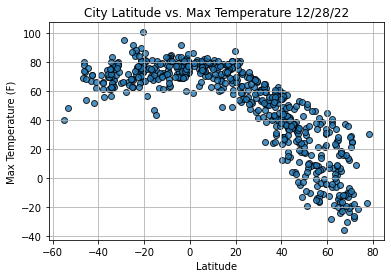

In [16]:
# Import time module

import time


# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,

            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig1.png")


# Show plot.

plt.show()

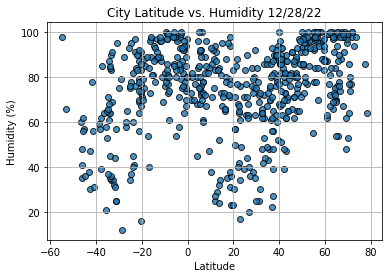

In [17]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig2.png")


# Show plot.

plt.show()

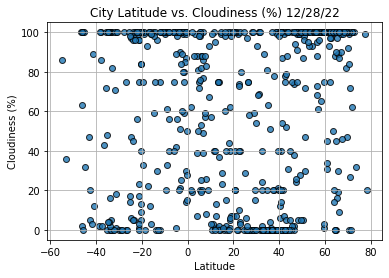

In [18]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig3.png")


# Show plot.

plt.show()

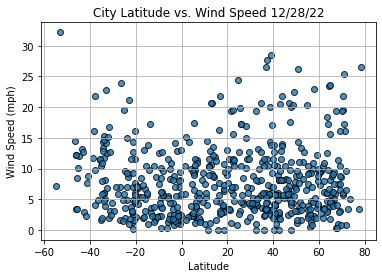

In [19]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,

            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)


# Save the figure.

plt.savefig("weather_data/Fig4.png")


# Show plot.

plt.show()

In [21]:
# Import linregress

from scipy.stats import linregress


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    
    # Run regression on hemisphere weather data.
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    
    # Calculate the regression line "y values" from the slope and intercept.
    
    regress_values = x_values * slope + intercept
    
    
    # Get the equation of the line.
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    
    # Create a scatter plot and plot the regression line.
    
    plt.scatter(x_values,y_values)
    
    plt.plot(x_values,regress_values,"r")
    
    
    # Annotate the text for the line equation.
    
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    plt.title(title)
    
    plt.xlabel('Latitude')
    
    plt.ylabel(y_label)
    
    plt.show()

In [22]:
index13 = city_data_df.loc[13]

In [23]:
city_data_df["Lat"] >= 0

0        True
1        True
2        True
3        True
4        True
        ...  
1191    False
1192     True
1193    False
1194     True
1195     True
Name: Lat, Length: 1196, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
1,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
2,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
3,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
4,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
...,...,...,...,...,...,...,...,...,...
1185,Zhuhai,22.2769,113.5678,58.78,67,40,19.57,CN,2022-12-29 02:18:49
1188,Coffeyville,37.0373,-95.6164,60.85,62,0,26.46,US,2022-12-29 02:18:50
1192,Grimshaw,56.1834,-117.6027,4.62,78,100,3.44,CA,2022-12-29 02:18:52
1194,Arvika,59.6553,12.5852,30.81,94,100,9.98,SE,2022-12-29 02:18:52


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
1,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
2,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
3,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07
4,Elko,41.0002,-115.5012,28.42,88,100,4.03,US,2022-12-29 01:50:07


In [26]:
# Create Northern and Southern Hemisphere DataFrames.

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

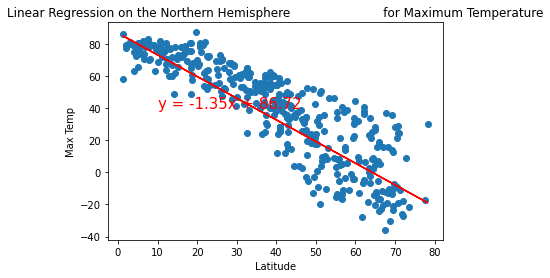

In [28]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(10,40))

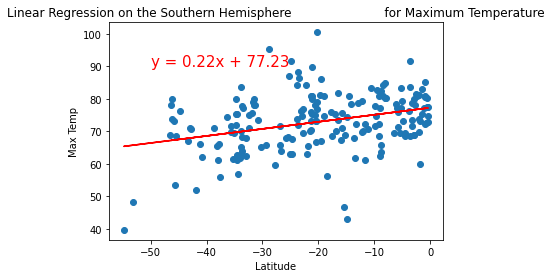

In [29]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Max Temp"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Maximum Temperature', 'Max Temp',(-50,90))

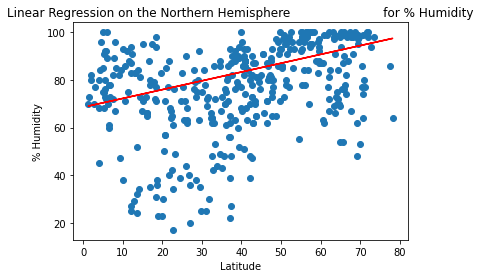

In [30]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Humidity', '% Humidity',(40,10))

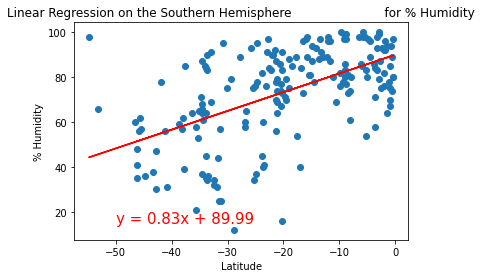

In [31]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Humidity"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,15))

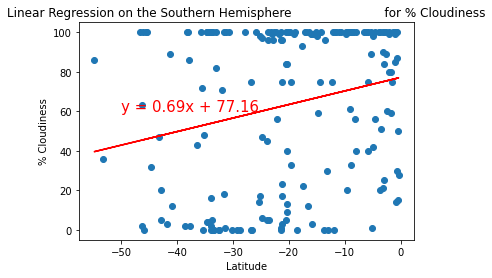

In [32]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Cloudiness"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(-50,60))

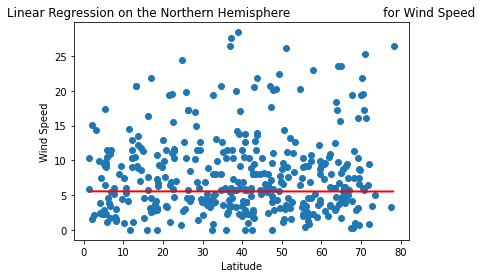

In [33]:
# Linear regression on the Northern Hemisphere

x_values = northern_hemi_df["Lat"]

y_values = northern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

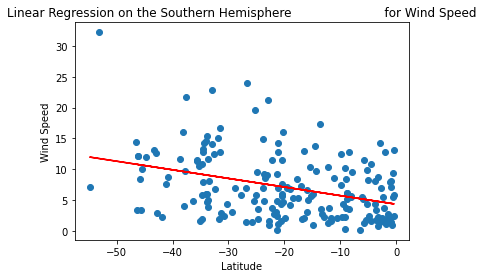

In [34]:
# Linear regression on the Southern Hemisphere

x_values = southern_hemi_df["Lat"]

y_values = southern_hemi_df["Wind Speed"]


# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))